# 2강 구현

### 정리
구현 : 머리속에 있는 알고리즘을 소스코드로 바꾸는 과정
관련 언어의 문법을 다양하고 쓰임을 정확하게 알야한다.


### 주의사항 for python
1. 파이썬은 자료형의 표현 범위 제한이 없다.
유효숫자를 주의해야 한다.

2. 구동시간이 느린편으로 1초에 2,000만번의 연산을 수행한다고 가정하고 문제를 푸는 것이 좋다.

  (ex) 제한시간 1초, 데이터 개수 100만 개라면 시간 복잡도가 O(NlogN) 이내의 알고리즘을 이용해 문제를 풀어야 한다.
(N = 1,000,000일 때 NlogN = 20,000,000)

  Pypy3는 Python3과 문법이 같지만 속도가 빨라서 이용할 수 있다면 쓰는 것이 좋다.

## 예제 4-1 상하좌우
난이도 : 하 / 풀이시간 : 15분 / 시간 제한 : 1초 / 메모리제한 128MB

In [ ]:
# 범위 지정 해서 무시
# 각 값들을 받아 +1씩 해주면 됨
n     = int(input())
plan  = input().split(" ")

x = 1
y = 1

for direction in plan : 
    if direction == "R" : 
        if x < n : 
            x += 1
    elif direction == "L" : 
        if x > 1 : 
            x -= 1
    elif direction == "D" : 
        if y < n : 
            y += 1
    elif direction == "U" : 
        if y > 1 : 
            y -= 1

print(f"{y} {x}")

5
R R R U D D
3 4


## 1번 Review
  - x, y = 1, 1로 깔끔하게 정리
  - 각 If 문을 사용하는 것보다
      dx = [0, 0, -1, 1]
      dy = [-1, 1, 0, 0]
      move_types = ['L', 'R', 'U', 'D']
      같이 list 형식으로 받아 for loop를 두번 돌려 해결하는 경우도 있다.
      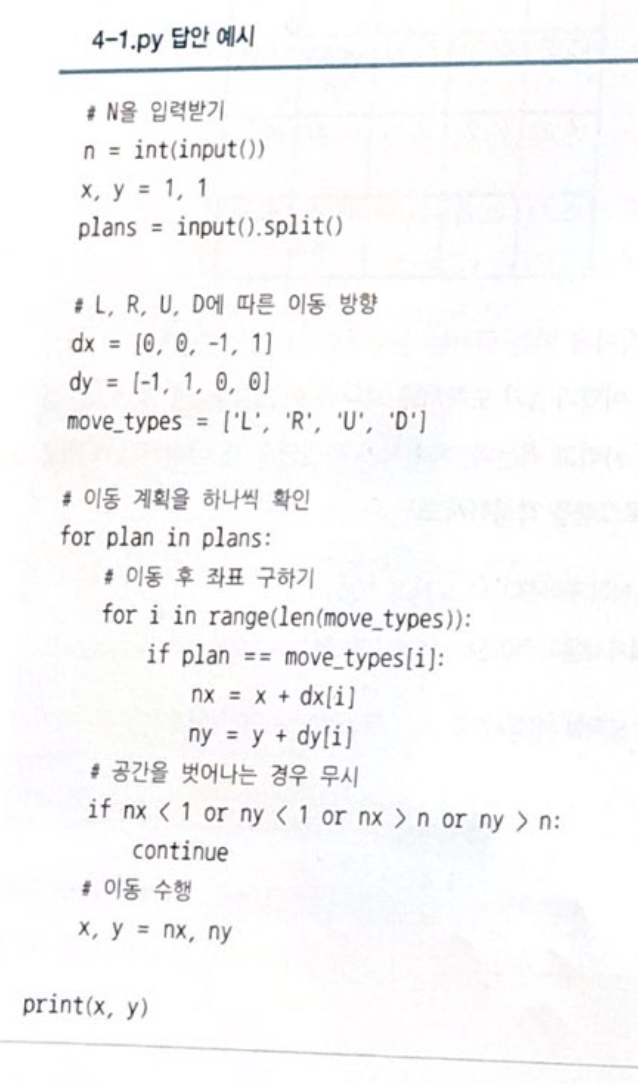


## 예제 4-2 시간
난이도 : 하 / 풀이시간 : 15분 / 시간 제한 : 1초 / 메모리제한 128MB

In [5]:
# 00시 00분 00초부터 N시 59분 59초까지의 시각 중 3이 하나라도 포함되는 모든 경우의 수를 구하는 프로그램
n        = int(input())

cnt = 0

for h in range(0, n+1) :
    for m in range(0, 60) :
        for s in range(0, 60) :
            time = f"{h}{m}{s}"
            if '3' in time : 
                cnt += 1

print(cnt)


5
11475


## 2번 Review
가장 빠른 방법을 생각하는 것도 좋지만, 시간조건과 메모리에 벗어나지 않는다면 쉬운 방법을 사용하는 것이 좋다.

  24\*60\*60=864,000으로서 경우의 수가 100,000개도 되지 않아 2초안에 해결이 가능하다

  위의 문제는 '완전탐색' 기법을 이용해 풀이했다.

## 실전문제 2 - 왕실의 나이트
8x8 좌표 평면에 나이트가 있다.
나이트는 
1. 수평으로 두 칸 이동한 뒤에 수직으로 한 칸이동
2. 수직으로 두 칸 이동한 뒤에 수평으로 한 칸 이동
의 경우로서만 이동이 가능하다.

나이트의 위치가 주어졌을 때 나이트가 이동할 수 있는 경우의 수를 출력해라


  행 위치 [1,8] / 열위치 [a, h]
  

In [26]:
# 리스트 덧셈 주의하기([2,1]+[1,2] = [2,1,1,2])
location = input()

x = ord(location[0])
y = int(location[1])

cnt     = 0
moves   = [[2, 1], [-2, 1], [2, -1], [-2, -1], [1, 2], [1, -2], [-1, 2], [-1, -2]]

def count_case(x, y) : 
    global cnt

    for move in moves :
        new_location = [x+move[0], y+move[1]] 
        if new_location[1] < 1 or new_location[1] > 8 or new_location[0] < ord('a') or new_location[0] > ord('h') :
            continue
        else : 
            #print(chr(new_location[0])+str(new_location[1]))
            cnt += 1

count_case(x, y)
print(cnt)

c2
e3
a3
e1
a1
d4
b4
6


## 실전문제 3 - 게임개발
바다 또는 육지가 있는직사각형 맵 N x M에서 캐릭터는 동서남북 중 한 곳을 바라본다.

맵의 칸은 각 (A, B)로 나타낼 수 있다

캐릭터의 움직임 설정 메뉴얼
1. 현재 방향을 기준으로 왼쪽 방향부터 차례대로 갈 곳을 정한다
2. 왼쪽에 가보지 않은 곳이 존재한다면 왼쪽 방향으로 회전한 다음 왼쪽으로 한칸을 전진한다, 없다면 다시 1을 반복한다
3. 네 방향 다 가본 칸이거나 바다로 되어있는 경우 바라보는 방향을 유지한채 한칸을 뒤로가고 1단계로 돌아간다. 뒤가 바다인 경우 움직임을 멈춘다.

이 과정을 반복적으로 수행하면서 캐릭터가 방문한 칸의 수를 출력해라



In [4]:
# Get input data
#n, m     = map(int, input().split())
#x, y, d  = list(map(int, input().split()))
#map_info = [list(map(int, input().split())) for _ in range(m)] 

# Example for Testing
n, m = 4, 4
x, y, d = [1, 1, 0]
map_info = [[1, 1, 1, 1], [1, 0, 0, 1], [1, 1, 0, 1], [1, 1, 1, 1]]

cnt     = 1
move    = [[0, -1], [1, 0], [0, 1], [-1, 0]]
history = []

while 1 :
    flag = 0
    for _ in range(4) :
        if d > 3 : 
            d = d % 4

        new_x = x+move[d][0]
        new_y = y+move[d][1]

        if map_info[new_x][new_y] == 0 and [new_x, new_y] not in history:
            x = new_x
            y = new_y
            history.append([x, y])

            flag = 1
            cnt += 1
            continue
        
        d += 1
        
    if not(map_info[x-1][y-1] == 1) :
        x = x - move[d][0] 
        y = y - move[d][1]

    if flag == 0: 
        break

print(cnt)

3


## 실전문제 3 Review
